In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import optuna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,matthews_corrcoef, precision_recall_curve,roc_auc_score




In [28]:
class DNN_1(nn.Module):
    def __init__(self, input_dim,dropout_rate=0.35):
        super(DNN_1, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout = nn.Dropout(dropout_rate)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)
        
        x = torch.relu(self.layer2(x))
        x = self.dropout(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout(x)

        x = torch.relu(self.layer4(x))
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [29]:
class DNN_2(nn.Module):
    def __init__(self, input_dim,dropout1=0.35,dropout2=0.5,dropout3=0.25,dropout4=0.1):
        super(DNN_2, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32,16)
        self.layer4 = nn.Linear(16,8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout3(x)

        x = torch.relu(self.layer4(x))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [30]:
class DNN_3(nn.Module):
    def __init__(self, input_dim,dropout1=0.15,dropout2=0.45):
        super(DNN_3, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x = torch.relu(self.layer2(x))
        x = self.dropout1(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer4(x))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [31]:
class DNN_4(nn.Module):
    def __init__(self, input_dim,dropout1=0.0,dropout2=0.1):
        super(DNN_4, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        

        x = torch.relu(self.layer4(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [32]:
class DNN_5(nn.Module):
    def __init__(self, input_dim,dropout_rate=0.2):
        super(DNN_5, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

        self.dropout = nn.Dropout(dropout_rate)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)
        
        x = torch.relu(self.layer2(x))
        x = self.dropout(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout(x)

        x = torch.relu(self.layer4(x))
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [33]:
class DNN_6(nn.Module):
    def __init__(self, input_dim,dropout1=0.45,dropout2=0.35,dropout3=0.3,dropout4=0.3):
        super(DNN_6, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32,16)
        self.layer4 = nn.Linear(16,8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout3(x)

        x = torch.relu(self.layer4(x))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [34]:
class DNN_7(nn.Module):
    def __init__(self, input_dim,dropout1=0.4,dropout2=0.1):
        super(DNN_7, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x = torch.relu(self.layer2(x))
        x = self.dropout1(x)

        x = torch.relu(self.layer3(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer4(x))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [35]:
class DNN_8(nn.Module):
    def __init__(self, input_dim,dropout1=0.4,dropout2=0.2):
        super(DNN_8, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        

        x = torch.relu(self.layer4(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [36]:
class DNN_9(nn.Module):
    def __init__(self, input_dim):
        super(DNN_9, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)


        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x = torch.relu(self.layer2(x))

        x = torch.relu(self.layer3(x))

        x = torch.relu(self.layer4(x))

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [37]:
class DNN_10(nn.Module):
    def __init__(self, input_dim):
        super(DNN_10, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)

        self.output_layer=nn.Linear(16,1)
        
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        
        x = torch.relu(self.layer2(x))
        
        x = torch.relu(self.layer3(x))
        
        x = torch.relu(self.layer4(x))

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [38]:
class DNN_11(nn.Module):
    def __init__(self, input_dim,dropout1=0.5,dropout2=0.1):
        super(DNN_11, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer4(x))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [39]:
class DNN_12(nn.Module):
    def __init__(self, input_dim,dropout1=0.2,dropout2=0.25):
        super(DNN_12, self).__init__()
        self.layer1 = nn.Linear(input_dim,64)
        self.layer2 = nn.Linear(64,32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
    
        
        x = torch.relu(self.layer2(x))
        x = self.dropout1(x)

        x = torch.relu(self.layer3(x))
        

        x = torch.relu(self.layer4(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [40]:
class DNN_13(nn.Module):
    def __init__(self, input_dim,dropout1=0.05,dropout2=0.3):
        super(DNN_13, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        x = self.dropout2(x)

        x = torch.relu(self.layer4(x))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [41]:
class DNN_14(nn.Module):
    def __init__(self, input_dim,dropout1=0.4,dropout2=0.3):
        super(DNN_14, self).__init__()
        self.layer1 = nn.Linear(input_dim,128)
        self.layer2 = nn.Linear(128,64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        
        x = torch.relu(self.layer2(x))
    

        x = torch.relu(self.layer3(x))
        

        x = torch.relu(self.layer4(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [42]:
df=pd.read_csv('../../data/learning_data.csv',index_col=0)

X=df.drop(columns='dengue',axis=1).values
y=df['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_test_tensor=torch.tensor(X_test, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test, dtype=torch.float32)

In [43]:
# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_paths = [
    "../../saved_model/DNN_1.pth",
    "../../saved_model/DNN_2.pth",
    "../../saved_model/DNN_3.pth",
    "../../saved_model/DNN_4.pth",
    "../../saved_model/DNN_6.pth",
    "../../saved_model/DNN_7.pth",
    "../../saved_model/DNN_11.pth"]

model_classes = {0: DNN_1,
                 1: DNN_2,
                 2: DNN_3,
                 3: DNN_4,
                 5: DNN_6,
                 6: DNN_7,
                 9: DNN_11}

models=[]

for i, path in enumerate(model_paths):
    if i in model_classes:
        model = model_classes[i](input_dim=X_train.shape[1]).to(device)
        model.load_state_dict(torch.load(path, map_location=device))
        model.eval()
        models.append(model)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
train_outputs = []
test_outputs = []

with torch.no_grad():
    for model in models:
        model.eval()
        
        train_output = model(X_train_tensor.to(device))
        train_outputs.append(train_output)
        
        # テストデータの出力
        test_output = model(X_test_tensor.to(device))
        test_outputs.append(test_output)

train_DL_features = torch.cat(train_outputs, dim=1)  
test_DL_features = torch.cat(test_outputs, dim=1) 

# 出力形状の確認
print(f"Train DL Features Shape: {train_DL_features.shape}")
print(f"Test DL Features Shape: {test_DL_features.shape}")


Train DL Features Shape: torch.Size([3508, 6])
Test DL Features Shape: torch.Size([878, 6])


In [ ]:
train_DL_features_np = train_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(train_DL_features_np.reshape(-1, train_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=5)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"train_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
train_standardized_features = scaler_standard.fit_transform(all_features)

print(f"train_standardized_features.shape: {train_standardized_features.shape}")

all_features.shape: (3508, 15)
train_DL_features_np.shape: (3508, 6)
train_standardized_features.shape: (3508, 15)


In [ ]:
test_DL_features_np = test_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(test_DL_features_np.reshape(-1, test_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=5)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"test_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
test_standardized_features = scaler_standard.fit_transform(all_features)

print(f"test_standardized_features.shape: {test_standardized_features.shape}")

all_features.shape: (878, 15)
test_DL_features_np.shape: (3508, 6)
test_standardized_features.shape: (878, 15)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_standardized_features, y_train, test_size=0.1,random_state=42)

In [ ]:
X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_val_tensor=torch.tensor(X_val, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(test_standardized_features, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=4, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=4, shuffle=False)

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, input_dim)
        self.bn2 = nn.BatchNorm1d(input_dim)

    def forward(self, x):
        residual = x  # 入力を保存 (ショートカット)
        out = torch.relu(self.bn1(self.fc1(x)))
        out = self.bn2(self.fc2(out))
        out += residual  # ショートカット接続
        return torch.relu(out)


In [ ]:
class ResNetBinaryClassifier(nn.Module):
    def __init__(self, input_dim, num_blocks, hidden_dim):
        super(ResNetBinaryClassifier, self).__init__()
        self.blocks = nn.Sequential(
            *[ResidualBlock(input_dim, hidden_dim) for _ in range(num_blocks)]
        )
        self.output_layer = nn.Linear(input_dim, 1)  # 出力層

    def forward(self, x):
        x = self.blocks(x)
        x = torch.sigmoid(self.output_layer(x))  # 2値分類用シグモイド
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ResNetBinaryClassifier(input_dim=X_train_tensor.shape[1], num_blocks=3,hidden_dim=64).to(device)

# 最適化と訓練を実行
optimizer = optim.Adam(model.parameters(), lr=0.0001,weight_decay=0.0001)
criterion = nn.BCELoss()

num_epochs=100
train_losses = []
val_losses = []

model.train()
for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch.squeeze())
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')

    if val_loader is not None:
        model.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val.squeeze())
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        model.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for DNN3')
plt.legend()
plt.grid()
plt.show()

/opt/conda/conda-bld/pytorch_1728945388038/work/aten/src/ATen/native/cuda/Loss.cu:94: operator(): block: [0,0,0], thread: [2,0,0] Assertion `input_val >= zero && input_val <= one` failed.


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Accuracy: 60.14%
Precision: 0.4811
Recall: 0.4130
F1 Score: 0.4444
Matthews Correlation Coefficient: 0.1374
Specificity: 0.7199


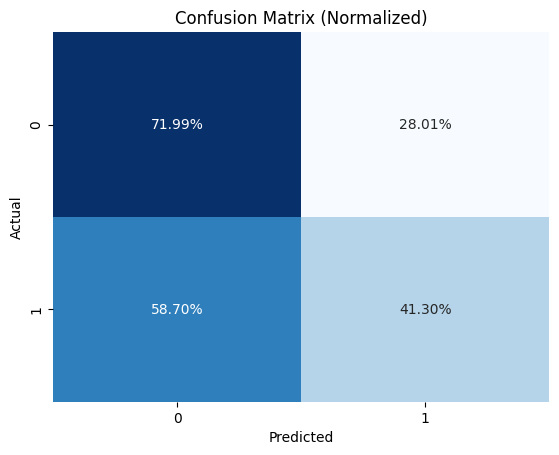

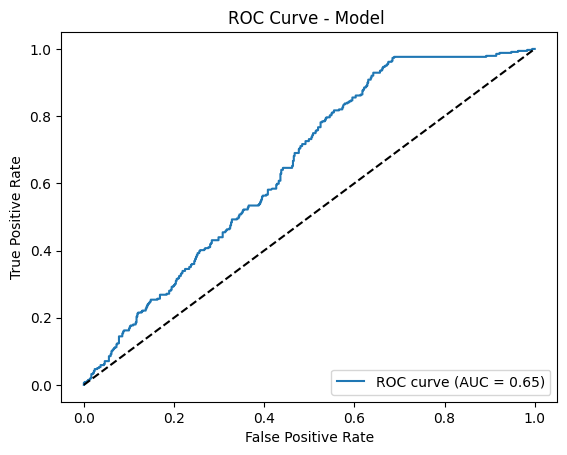

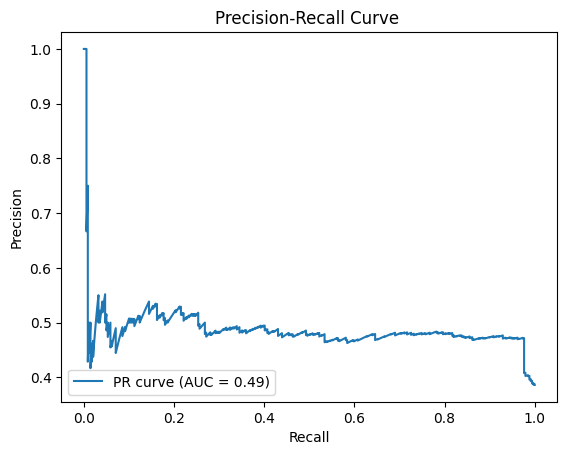

In [ ]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    # 予測と確率
    test_outputs = model(X_test_tensor).squeeze()
    predictions = (test_outputs >0.49).float()
    y_true = y_test_tensor.cpu().numpy()
    y_pred = predictions.cpu().numpy()
    y_prob = test_outputs.cpu().numpy()

# 評価指標
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)  
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Matthews Correlation Coefficient: {mcc:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # 混同行列（割合表示）
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Normalized)")
    plt.show()

    # ROC曲線とAUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model ')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall曲線
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ')
    plt.legend(loc="lower left")
    plt.show()    

In [ ]:
torch.save(model.state_dict(), '../../saved_model/DNN_stack_model2.pth')

